## DS School의 데이터분석 팀에 오신 것을 환영합니다!

(이 쥬피터 노트북은 다음의 링크 http://bit.ly/dsa-0202-K8RE-ipynb 데이터는 https://bit.ly/dsa-dsschool 에서 다운받을 수 있습니다.)

안녕하세요! [DS School](https://dsschool.co.kr) 데이터분석팀에 오신 것을 환영합니다.

[DS School](https://dsschool.co.kr)은 직무교육 스타트업으로 데이터 사이언스와 데이터 마케팅 수업을 진행하고 있습니다.

오늘 이 쥬피터 노트북을 받은 수강생분들께서는 하루동안 DS School의 일일 데이터 분석가(Data Analyst)로서 일을 할 것입니다. DS School의 데이터베이스에서 파일을 읽어와 운영, 기획, 마케팅, 재무팀의 요청사항을 분석한 뒤, 그 결과를 전달하는 것이 오늘의 목표입니다.

DS School의 마케팅팀은 분석 결과를 바탕으로 사용 플랫폼별 예산을 재조정할 수도 있고, 캠페인별 성과를 비교분석하여 사용자의 니즈를 파악함과 동시에 캠페인별 예산 비중을 조절할 수 있습니다. 또한, 재무팀은 분석 결과를 바탕으로 매출을 예측할 수 있고 이를 바탕으로 예산안을 작성할 수도 있습니다.

반면 데이터 분석가(Data Analyst)가 정확한 분석 결과를 전달해주지 못한다면, 마케팅팀은 마케팅 예산을 재조정하는데 실패함으로써 회사의 매출을 감소시킬 수 있습니다. 운영팀과 기획팀은 매출이 잘 나오지 않는 컨텐츠에 많은 시간과 비용을 투입함으로써 회사에 손해를 안길 것입니다. 재무팀은 회사의 앞으로의 재무상황을 잘못 예측함으로써 큰 위기에 빠질 수 있습니다.

그러므로 데이터를 정확하게 분석하는 것은 무엇보다도 중요합니다. 하기에 제시한 15개의 데이터 분석 요청을 프로그래밍 언어 파이썬(Python)과 파이썬의 데이터 분석 패키지 판다스(Pandas), 그리고 데이터베이스 관리 패키지인 SQLite를 활용해 풀어주세요.

숙련된 데이터분석가의 경우 하기의 요청을 늦어도 2시간 내에는 해결할 수 있습니다. 즉, **2시간 안에 모든 문제를 풀 수 있다면 합격입니다.**

문제를 풀 때 다른 자료를 참고하거나, 구글에 검색하는 것 모두 허용합니다. (문제 중에는 구글에 검색하지 않으면 풀 수 없는 문제도 준비해놓았습니다) 관련 자료는 [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)를 강력 추천합니다. 또한, SQL에 대해 궁금하신 내용은 [SQL Tutorial](https://www.w3schools.com/sql/)을 참고할 것을 추천드립니다. 이전 수업에서 학습한 내용을 참고하는 것도 적극 추천합니다.

## 데이터 로딩하기

먼저 데이터를 로딩하도록 하겠습니다. 저번 주 수업과는 달리 여러분들은 엔지니어가 추출해준 csv 파일을 받은 것이 아닌 데이터베이스에 대한 접근 권한을 받았습니다. 따라서, 여러분들은 DB에서 필요한 데이터를 추출하는데 필요한 쿼리문을 이용하여 데이터를 불러와야 합니다.



--- 
### 데이터셋 설명

여러분들이 사용할 수 있는 테이블의 리스트는 다음과 같습니다.
 
* surveys

    DS School 홈페이지에 접속하게 되면 설문조사를 수행하게 되고, 이 결과를 바탕으로 적절한 강의를 선정해 과목 추천을 해드리고 있습니다. 이 때, 수집한 설문조사 내용은 고객의 수요를 조사하는데 아주 소중한 자산이 되고, 강의 내용에 대한 피드백이나 향후 오픈할 강의의 우선순위를 정하는데 쓰일 수 있습니다.
    
    
 * users
 
    여러가지 마케팅 채널들을 통해서 유입된 고객들에게는 별도의 id가 부여가 됩니다. 이를 통해 고객의 결제 유무 등을 파악할 수 있고, 이는 마케팅 채널별 효율 분석에 소중한 자산이 됩니다. mixpanel에서 사용하는 id와 DS School에서 자체적으로 사용하는 데이터베이스의 user id를 연결시켜주는 역할을 하고, 고객의 개인정보를 가지고 있습니다. 이는 비식별화 과정을 거쳐 제공됩니다.
    
    
* payments

    유저들의 결제 정보입니다. 연락처와 수강신청한 기수, 결제일, 결제 상태 등이 제공되는데 마찬가지로 개인정보는 비식별화되어있는 상태로 제공됩니다. 2018년 이전의 결제 정보가 포함되어 있습니다.
    

* 믹스패널 데이터

    DS School은 웹로그 데이터 분석을 위해 믹스패널을 사용합니다. 2009년 설립된 믹스패널은 사용자 추적을 기본으로 하는 분석 툴로, 원하는 서비스 사용자를 지정하면 해당 유저의 활동을 모두 조회할 수 있는 기능을 제공해줍니다. 이를 통해 해당 사용자 그룹의 특성과 사용 패턴을 알 수 있습니다. 유명 액셀러레이터 ‘Y Combinator’의 멤버로 트위치, 우버, 핏빗, 스포티파이, 세일즈포스 등의 고객사를 보유하고 있으며 2016년 1월 기준 누적 투자액 800억원을 기록함과 동시에 기업 가치 9,000억원대로 평가 받는 분석툴이기도 합니다. 실시간분석이 가능하며 코호트 분석과 잔존율, 퍼널 분석이 가능합니다. 믹스패널 데이터 또한 고객의 유입경로 등의 정보를 가지고 있습니다. 제공되는 데이터는 믹스패널 데이터베이스에서 추출한 자료이기 때문에 csv파일로 제공됩니다.

---

**1. 데이터베이스에서 설문조사 결과를 읽어와주세요. 그 다음 사용자와 질문을 기준으로 정렬해주세요.**

설문조사 결과를 분석하여, DS School 홈페이지에 접속하는 사람들이 왜 데이터 사이언스에 관심이 있는지 파악하려고 합니다. 고객들의 니즈를 파악하여 향후 어떤 강의를 우선적으로 오픈할지 결정할 수도 있고, 수강생들에게 어떤 내용의 자료를 보여드려야할지 결정할 수도 있습니다.

하지만, 중복응답이 가능한 설문조사이다 보니, 데이터베이스에 정보가 보기좋게 정리되어 있지는 않습니다. 이를 응답한 사람과 질문 번호 순으로 정렬해주세요.

데이터베이스에 설문 데이터가 정리 후에 정답은 다음과 같이 나오게 됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>survey_id</th>
      <th>user_id</th>
      <th>question_id</th>
      <th>answer1_selected</th>
      <th>answer2_selected</th>
      <th>answer3_selected</th>
      <th>answer4_selected</th>
      <th>answer5_selected</th>
      <th>answer6_selected</th>
      <th>answer7_selected</th>
      <th>answer8_selected</th>
      <th>answer9_selected</th>
      <th>answer10_selected</th>
      <th>answer11_selected</th>
      <th>answer12_selected</th>
      <th>created_at</th>
      <th>updated_at</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>73176</th>
      <td>os5048odsazv</td>
      <td>006tq68icz4g</td>
      <td>1</td>
      <td>t</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>2018-03-17 16:15:50.334428</td>
      <td>2018-03-17 16:15:50.334428</td>
    </tr>
    <tr>
      <th>73168</th>
      <td>t5qwx5xdjcwy</td>
      <td>006tq68icz4g</td>
      <td>2</td>
      <td>t</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>2018-03-17 16:16:03.192710</td>
      <td>2018-03-17 16:16:03.19271</td>
    </tr>
    <tr>
      <th>73177</th>
      <td>rok2mzb73rf6</td>
      <td>006tq68icz4g</td>
      <td>3</td>
      <td>f</td>
      <td>t</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>t</td>
      <td>f</td>
      <td>2018-03-17 16:16:37.648422</td>
      <td>2018-03-17 16:16:37.648422</td>
    </tr>
    <tr>
      <th>73184</th>
      <td>oilk23xum4ur</td>
      <td>006tq68icz4g</td>
      <td>4</td>
      <td>f</td>
      <td>t</td>
      <td>f</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>2018-03-17 16:16:51.857495</td>
      <td>2018-03-17 16:16:51.857495</td>
    </tr>
    <tr>
      <th>73185</th>
      <td>utjiy4kgyvre</td>
      <td>006tq68icz4g</td>
      <td>5</td>
      <td>f</td>
      <td>f</td>
      <td>t</td>
      <td>f</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>2018-03-17 16:17:09.312639</td>
      <td>2018-03-17 16:17:09.312639</td>
    </tr>
  </tbody>
</table>

In [1]:
#데이터를 불러오는데 필요한 판다스와 sqlite3를 import 해주세요.
import pandas as pd
import sqlite3

In [2]:
# 판다스는 테이블을 출력할 때, row나 column이 일정 개수 이상 넘으면 생략해서 보여줍니다.
# column을 생략하길 원하지 않는 경우 아래와 같이 옵션을 주어 생략되지 않도록 할 수 있습니다.
pd.options.display.max_columns = 50

In [3]:
# data폴더의 dsschool.db에 접속을 해주세요.
connect = sqlite3.connect('data/dsschool.db')
connect

In [4]:
# 'surveys' 테이블의 모든 컬럼을 가져오는 쿼리를 작성 후 read_sql로 불러와주세요.
query = "SELECT * FROM 'surveys'"

surveys = pd.read_sql(query, connect)

print(surveys.shape)
surveys.head(5)

(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,6db349t1avoz,0okqilfizbm0,6,f,f,t,t,f,f,None,None,None,None,None,None,2018-01-03 21:07:08.255947,2018-01-03 21:07:08.255947
2,iuh1km11h7td,08w2telpm7ql,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-04 16:06:34.609819,2018-01-04 16:06:34.609819
3,np4c2056ovmv,489cr69azkwb,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-05 06:20:36.441461,2018-01-05 06:20:36.441461
4,hq9epyzv3wsv,ker7vpzk48g0,6,f,f,t,f,t,t,None,None,None,None,None,None,2018-01-19 06:35:25.292356,2018-01-19 06:35:25.292356


In [5]:
# surveys를 user_id와 question_id, 그리고 created_at를 기준으로 정렬해주세요. user_id를 우선으로 정렬해야 합니다.
surveys = surveys.sort_values(['user_id', 'question_id', 'created_at'])
surveys.head()

#surveys.sort_values(['user_id', 'question_id'], inplace=True) 로 위 코드를 대체할 수 있습니다.

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639


---

**2. Survey 정보를 cleaning해주세요.**

Surveys 테이블은 원본 데이터이기 때문에 분석을 위해서는 cleaning 작업이 필요합니다. 여러분이 해주셔야 할 처리는 다음과 같습니다.
  
     * answer 값이 't', 'f'로 입력되어 있는데 이를 True, False로 변환해주세요.
     * created_at과 updated_at을 datetime 형식으로 변환해주세요.
     * 같은 user_id가 여러번의 설문조사를 응답한 경우도 제거해주세요.

정리 후의 테이블은 다음과 같이 나오게됩니다.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>survey_id</th>
      <th>user_id</th>
      <th>question_id</th>
      <th>answer1_selected</th>
      <th>answer2_selected</th>
      <th>answer3_selected</th>
      <th>answer4_selected</th>
      <th>answer5_selected</th>
      <th>answer6_selected</th>
      <th>answer7_selected</th>
      <th>answer8_selected</th>
      <th>answer9_selected</th>
      <th>answer10_selected</th>
      <th>answer11_selected</th>
      <th>answer12_selected</th>
      <th>created_at</th>
      <th>updated_at</th>
      <th>answer1_selected(bool)</th>
      <th>answer2_selected(bool)</th>
      <th>answer3_selected(bool)</th>
      <th>answer4_selected(bool)</th>
      <th>answer5_selected(bool)</th>
      <th>answer6_selected(bool)</th>
      <th>answer7_selected(bool)</th>
      <th>answer8_selected(bool)</th>
      <th>answer9_selected(bool)</th>
      <th>answer10_selected(bool)</th>
      <th>answer11_selected(bool)</th>
      <th>answer12_selected(bool)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>73176</th>
      <td>os5048odsazv</td>
      <td>006tq68icz4g</td>
      <td>1</td>
      <td>t</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>2018-03-17 16:15:50.334428</td>
      <td>2018-03-17 16:15:50.334428</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>73168</th>
      <td>t5qwx5xdjcwy</td>
      <td>006tq68icz4g</td>
      <td>2</td>
      <td>t</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>2018-03-17 16:16:03.192710</td>
      <td>2018-03-17 16:16:03.19271</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>73177</th>
      <td>rok2mzb73rf6</td>
      <td>006tq68icz4g</td>
      <td>3</td>
      <td>f</td>
      <td>t</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>t</td>
      <td>f</td>
      <td>2018-03-17 16:16:37.648422</td>
      <td>2018-03-17 16:16:37.648422</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
    </tr>
    <tr>
      <th>73184</th>
      <td>oilk23xum4ur</td>
      <td>006tq68icz4g</td>
      <td>4</td>
      <td>f</td>
      <td>t</td>
      <td>f</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>2018-03-17 16:16:51.857495</td>
      <td>2018-03-17 16:16:51.857495</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>73185</th>
      <td>utjiy4kgyvre</td>
      <td>006tq68icz4g</td>
      <td>5</td>
      <td>f</td>
      <td>f</td>
      <td>t</td>
      <td>f</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>2018-03-17 16:17:09.312639</td>
      <td>2018-03-17 16:17:09.312639</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
  </tbody>
</table>
</div>



answer의 t 값과 f값을 True, False로 변환하는 코드를 작성해주세요. 원본 데이터를 수정하지 말고 새로운 컬럼을 만들어주세요. (ex. answer1_selected(bool))

In [6]:
for i in range(1, 13):
    old_column = f'answer{i}_selected'
    new_column = f'answer{i}_selected(bool)'
    surveys[new_column] = (surveys[old_column] == 't')
    
print(surveys.shape)
surveys.head()

(136063, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


created_at과 updated_at을 datetime 자료형으로 변환해주세요. pd.to_datetime() 함수를 활용하는 것이 편합니다.

In [7]:
surveys["created_at"] = pd.to_datetime(surveys["created_at"])
surveys["updated_at"] = pd.to_datetime(surveys["updated_at"])

surveys.dtypes

survey_id                          object
user_id                            object
question_id                         int64
answer1_selected                   object
answer2_selected                   object
answer3_selected                   object
answer4_selected                   object
answer5_selected                   object
answer6_selected                   object
answer7_selected                   object
answer8_selected                   object
answer9_selected                   object
answer10_selected                  object
answer11_selected                  object
answer12_selected                  object
created_at                 datetime64[ns]
updated_at                 datetime64[ns]
answer1_selected(bool)               bool
answer2_selected(bool)               bool
answer3_selected(bool)               bool
answer4_selected(bool)               bool
answer5_selected(bool)               bool
answer6_selected(bool)               bool
answer7_selected(bool)            

**참고**

pd.to_datetime() 함수를 사용할 때, datetime 형식이 기본형이 아닌 경우 format 옵션을 이용하여 형식을 지정해줄 수 있습니다.



In [8]:
pd.to_datetime('2018년 5월 3일 17시 45분 23초', format='%Y년 %m월 %d일 %H시 %M분 %S초')

Timestamp('2018-05-03 17:45:23')

---

같은 유저가 여러번 설문조사를 응답한 경우를 제거해주세요, drop_duplicates() 메소드를 사용하는데, keep 옵션을 통해 어떤 정보를 남길지 정할 수 있습니다.

In [9]:
surveys = surveys.drop_duplicates(['user_id', 'question_id'], keep='last')

print(surveys.shape)
surveys.head()

(93481, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.192710,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


---

**3. 데이터베이스에서 결제정보를 불러와주세요. 그리고 연락처와 수업정보를 정리해주세요.**

데이터베이스의 payments 테이블에서 데이터를 읽어오겠습니다. 마찬가지로 쿼리문과 데이터베이스에 접속하기 위한 커넥터를 이용하여 테이블을 가져옵니다.

In [10]:
#payments의 모든 컬럼을 읽어오는 쿼리문을 작성해주세요. 그리고 WHERE 문에 조건을 적절하게 넣어주세요.
payments = pd.read_sql("SELECT * FROM 'payments'", connect)

print(payments.shape)
payments.head()

(937, 9)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료


개인정보 보호를 위해 연락처 정보는 비식별화 처리된 상태입니다.

이번에는 연락처 정보를 정리하도록 하겠습니다. 결제창에서 수기로 연락처를 입력받아 수강생별로 연락처의 양식이 들쑥날쑥합니다. 이번에는 모든 연락처의 양식을 010-xxxx-xxxx으로 통일해주세요. 단, 010으로 시작하지 않는 전화번호는 잘못 기입된 전화번호라고 가정하고 NaN값 처리해주세요.

*참고*
이 문제를 풀기 위해서는 string (문자열)에 관련된 메소드를 알고 있어야 합니다. 문자열에 관련된 함수와 정규 표현식의 상세한 내용은 수업의 범위를 벗어나므로 링크로 대체합니다. pandas.Series.str에 대한 정보는 [다음 링크](https://pandas.pydata.org/pandas-docs/stable/api.html#string-handling)에 잘 정리되어 있습니다. 또한, 문자 내에서 특정 역할을 하는 **정규 표현식**은 [다음 링크](https://wikidocs.net/4308)에 잘 설명되어 있습니다.

010이나 +82로 시작하는 번호를 골라주세요. +의 경우 문자 내에서 특정한 역할을 수행하기 때문에 이를 무력화 시켜주는 역슬래시(\)를 사용하여야 합니다. 

In [11]:
valid_phone_number = (payments["연락처"].str.contains("^010|\+82"))

payments["연락처(clean)"] = payments["연락처"]

payments.loc[~valid_phone_number, "연락처(clean)"] = pd.np.nan

print(payments.shape)
payments.loc[~valid_phone_number, ["연락처", "연락처(clean)"]].head()

(937, 10)


,연락처,연락처(clean)
176,asdasda,NaN
261,0thed0nonn,NaN
707,123131,NaN
708,16474540316,NaN
843,Mana,NaN


각 행, 또는 각 열에 스스로 만든 함수를 사용하고 싶은 경우에는 apply, map, applymap을 사용합니다. 이 경우에는 연락처의 각 데이터에 대쉬 (-)를 사이사이에 넣는 작업을 할 수 있는 함수를 만들어 apply, map, applymap 등을 사용해야 합니다.

In [12]:
# 대시(-)가 있으면 그대로 반환, 없으면 대시를 넣어주는 함수를 만들어 주세요. 그리고 apply를 이용해 이를 적용해주세요.
def clean_phone_number(phone_number):
    if pd.isnull(phone_number):
        return pd.np.nan

#대시가 문자열에 이미 있다면 번호를 그대로 반환합니다.
    if "-" in phone_number:
        return phone_number
    
#대시가 문자열에 없다면 자릿수에 맞추어 대시를 넣어줍니다.
    else:
        phone_number = phone_number[0:3] + "-" + phone_number[3:7] + '-' + phone_number[7:]
        
        return phone_number

#연락처 데이터에 clean_phone_number 함수를 각각 적용시킵니다.
#그리고 이 데이터들로 연락처(clean) 칼럼을 대체합니다.
payments["연락처(clean)"] = payments["연락처(clean)"].apply(clean_phone_number)

print(payments.shape)
payments[["연락처", "연락처(clean)"]].head()

(937, 10)


,연락처,연락처(clean)
0,01056007186,010-5600-7186
1,01050015510,010-5001-5510
2,01044158112,010-4415-8112
3,01065775220,010-6577-5220
4,010-6433-3577,010-6433-3577


신청 수업을 쪼개어 수업타입과 기수를 만들어내는 작업 또한 string 메소드를 사용해야 합니다. split을 이용하여 띄어쓰기 별로 데이터를 분리한 뒤, 마지막 단어는 기수, 그 앞의 모든 단어들은 수업타입으로 만들어줄 수 있습니다.

In [13]:
# string.split() 사용 예시입니다. 구분 기준마다 문자를 나누어 리스트로 만들어줍니다.
print('010-1234-5678'.split('-'))

#별도로 구분 기준을 정해주지 않는 경우 자동으로 공백을 기준으로 분리합니다.
print('입문 속성반 5기'.split())

['010', '1234', '5678']
['입문', '속성반', '5기']


In [14]:
#뒤의 2개를 붙이고 싶은 경우 붙이는 ''.join()을 이용합니다.
example_list = ['입문', '속성반', '5기']

print(''.join(example_list[1:]))

print('--'.join(example_list[1:]))

속성반5기
속성반--5기


In [15]:
#신청수업을 띄어쓰기를 기준으로 split합니다. 그리고 이를 이용하여 수업타입과 기수를 분리해줍니다.
payments['기수'] = payments['신청수업'].str.split().map(lambda row : row[-1])

#join을 사용하여 마지막을 제외한 모든 리스트의 문자들을 붙여줍니다.
payments['수업타입'] = payments['신청수업'].str.split().map(lambda row : ''.join(row[:-1]))


payments[['신청수업', '수업타입', '기수']].head()

,신청수업,수업타입,기수
0,입문반 22기,입문반,22기
1,중급반 5기,중급반,5기
2,입문반 22기,입문반,22기
3,입문반 22기,입문반,22기
4,중급반 5기,중급반,5기


---

**4. 2018년 이후 결제 정보를 정리해주세요.**

결제정보가 잘 정리되어 있지만, 분석을 진행하기 위해 처리해야할 사항이 남아있습니다. 

먼저, 
    
    1) 신청날짜 컬럼을 datetime 자료형으로 만들어주세요.
    2) 결제가 완료된 경우 True, 아닌 경우 False인 컬럼을 만들어주세요.


In [16]:
#pd.to_datetime() 을 이용하여 '신청날짜' 컬럼을 datetime 형식으로 변환해줍니다.
payments["신청날짜"] = pd.to_datetime(payments["신청날짜"])

payments.dtypes

payment_id            object
이름                    object
이메일                   object
연락처                   object
신청날짜          datetime64[ns]
신청수업                  object
금액                    object
결제방법                  object
상태                    object
연락처(clean)            object
기수                    object
수업타입                  object
dtype: object

In [17]:
#상태가 결제 완료인 경우는 True, 아닌 경우는 False로 하는 컬럼을 만들어줍니다.
payments["상태(bool)"] = (payments["상태"] == "결제 완료")

print(payments.shape)
payments[["상태", "상태(bool)"]].head()

(937, 13)


,상태,상태(bool)
0,결제 완료,True
1,결제 완료,True
2,결제 완료,True
3,결제 완료,True
4,결제 완료,True


---

**5. 결제 데이터에서 신청날짜 칼럼을 이용하여 월, 일, 요일, 시간 칼럼을 추가해주세요. 그리고, 금액 정보를 정수형 (int)로 바꿔주세요.**

월, 일, 시간, 요일 등을 기준으로 피벗테이블을 만들거나 그래프를 그리려면 그에 해당하는 칼럼을 만들어주어야 합니다. 입문반에서 배웠던 슬라이싱(Slicing)을 이용해 문자를 쪼개는 방식으로 할 수도 있지만, 자료형을 datetime으로 만들어버리면 더욱 쉽게 월, 일, 시간, 요일 등의 정보를 만들어낼 수 있습니다.

정답은 다음과 같이 나오게 됩니다. 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>신청날짜</th>
      <th>신청날짜(연)</th>
      <th>신청날짜(월)</th>
      <th>신청날짜(일)</th>
      <th>신청날짜(시)</th>
      <th>신청날짜(분)</th>
      <th>신청날짜(초)</th>
      <th>신청날짜(요일)</th>
      <th>금액</th>
      <th>금액(int)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2018-01-31 15:42:20</td>
      <td>2018</td>
      <td>1</td>
      <td>31</td>
      <td>15</td>
      <td>42</td>
      <td>20</td>
      <td>Wednesday</td>
      <td>495,000</td>
      <td>495000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2018-01-31 15:29:24</td>
      <td>2018</td>
      <td>1</td>
      <td>31</td>
      <td>15</td>
      <td>29</td>
      <td>24</td>
      <td>Wednesday</td>
      <td>594,000</td>
      <td>594000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2018-01-31 14:04:14</td>
      <td>2018</td>
      <td>1</td>
      <td>31</td>
      <td>14</td>
      <td>4</td>
      <td>14</td>
      <td>Wednesday</td>
      <td>495,000</td>
      <td>495000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2018-01-31 10:18:19</td>
      <td>2018</td>
      <td>1</td>
      <td>31</td>
      <td>10</td>
      <td>18</td>
      <td>19</td>
      <td>Wednesday</td>
      <td>495,000</td>
      <td>495000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2018-01-30 19:12:54</td>
      <td>2018</td>
      <td>1</td>
      <td>30</td>
      <td>19</td>
      <td>12</td>
      <td>54</td>
      <td>Tuesday</td>
      <td>594,000</td>
      <td>594000</td>
    </tr>
  </tbody>
</table>

In [18]:
#.dt를 이용하여 연,월,일,시,분,요일 에 해당하는 칼럼을 만들어주세요.

payments["신청날짜(연)"] = (payments["신청날짜"].dt.year)
payments["신청날짜(월)"] = (payments["신청날짜"].dt.month)
payments["신청날짜(일)"] = (payments["신청날짜"].dt.day)
payments["신청날짜(시)"] = (payments["신청날짜"].dt.hour)
payments["신청날짜(분)"] = (payments["신청날짜"].dt.minute)
payments["신청날짜(초)"] = (payments["신청날짜"].dt.second)

payments["신청날짜(요일)"] = payments["신청날짜"].dt.day_name()

print(payments.shape)
payments[["신청날짜", "신청날짜(연)", "신청날짜(월)", "신청날짜(일)", "신청날짜(시)", "신청날짜(분)", "신청날짜(초)", "신청날짜(요일)"]].head()

(937, 20)


,신청날짜,신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일)
0,2018-01-31 15:42:20,2018,1,31,15,42,20,Wednesday
1,2018-01-31 15:29:24,2018,1,31,15,29,24,Wednesday
2,2018-01-31 14:04:14,2018,1,31,14,4,14,Wednesday
3,2018-01-31 10:18:19,2018,1,31,10,18,19,Wednesday
4,2018-01-30 19:12:54,2018,1,30,19,12,54,Tuesday


In [19]:
# 문자 자료형인 금액을 ,를 제거한 뒤 숫자 자료형(int)로 만들어주세요.
# ,를 제거할 때, Series.str.replace() 함수를 사용할 수 있습니다.
payments['금액(int)'] = payments['금액'].str.replace(',', '').astype(int)

print(payments.dtypes)
payments[["금액", "금액(int)"]].head()

payment_id            object
이름                    object
이메일                   object
연락처                   object
신청날짜          datetime64[ns]
신청수업                  object
금액                    object
결제방법                  object
상태                    object
연락처(clean)            object
기수                    object
수업타입                  object
상태(bool)                bool
신청날짜(연)                int64
신청날짜(월)                int64
신청날짜(일)                int64
신청날짜(시)                int64
신청날짜(분)                int64
신청날짜(초)                int64
신청날짜(요일)              object
금액(int)                int64
dtype: object


,금액,금액(int)
0,"495,000",495000
1,"594,000",594000
2,"495,000",495000
3,"495,000",495000
4,"594,000",594000


---

**6. 결제 데이터를 바탕으로 요일별, 시간별 결제량의 차이를 구해주세요.**

DS School에서 주로 사용하고 있는 마케팅 채널인 페이스북은 시간, 요일대별 광고 노출빈도를 조절할 수 있는 기능이 있습니다. 기존의 결제 패턴을 분석해 결제가 특정 시간대에서 높게 일어난다면 해당 시간대에 더 많은 예산을 사용하는 것이 효율적일 것입니다.

피벗테이블을 만들었을 때 결과가 다음과 같이 나와야 합니다.

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>sum</th>
      <th>count</th>
    </tr>
    <tr>
      <th></th>
      <th>금액(int)</th>
      <th>금액(int)</th>
    </tr>
    <tr>
      <th>신청날짜(요일)</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Monday</th>
      <td>91184000</td>
      <td>145</td>
    </tr>
    <tr>
      <th>Tuesday</th>
      <td>78183000</td>
      <td>128</td>
    </tr>
    <tr>
      <th>Wednesday</th>
      <td>100303000</td>
      <td>170</td>
    </tr>
    <tr>
      <th>Thursday</th>
      <td>102165000</td>
      <td>175</td>
    </tr>
    <tr>
      <th>Friday</th>
      <td>86818000</td>
      <td>155</td>
    </tr>
    <tr>
      <th>Saturday</th>
      <td>44337000</td>
      <td>76</td>
    </tr>
    <tr>
      <th>Sunday</th>
      <td>54212000</td>
      <td>88</td>
    </tr>
  </tbody>
</table>

In [20]:
#마찬가지로, 요일별 결제량의 차이를 구해주세요.
table = payments.pivot_table(values='금액(int)', index='신청날짜(요일)', aggfunc=['sum', 'count'])

dayname = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

table.loc[dayname]

,sum,count
,금액(int),금액(int)
신청날짜(요일),,
Monday,91184000,145
Tuesday,78183000,128
Wednesday,100303000,170
Thursday,102165000,175
Friday,86818000,155
Saturday,44337000,76
Sunday,54212000,88


평일의 결제량이 주말에 비해 매우 높은 것을 알 수 있습니다. 이를 시간별 결제량과 연결지어보도록 하겠습니다.

In [21]:
#시각에 따른 피벗테이블도 마찬가지로 만들어주세요.
payments.pivot_table(values='금액(int)', index='신청날짜(시)', aggfunc=['sum', 'count'])

,sum,count
,금액(int),금액(int)
신청날짜(시),,
0,19962000,35
1,9663000,16
2,5699000,9
3,3122000,5
4,4066000,6
5,2033000,3
6,6251000,8
7,5643000,11


테이블이 너무 길어지면 정보가 한 눈에 들어오지 않는 경우가 있습니다. 이 때는 시각화를 통해 그래프를 그리는 것이 직관적으로 데이터를 보기에 더 좋을 수도 있습니다.

In [22]:
# 파이썬 데이터프레임에는 .plot() 메소드가 있습니다. matplotlib을 이용하는데, matplotlib이 한글을 기본으로 인식하지 못하기 때문에 폰트를 수정해주어야 합니다.
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'AppleGothic'
# 윈도우의 경우 'AppleGothic' 대신에 'Malgun Gothic'을 입력해주세요.

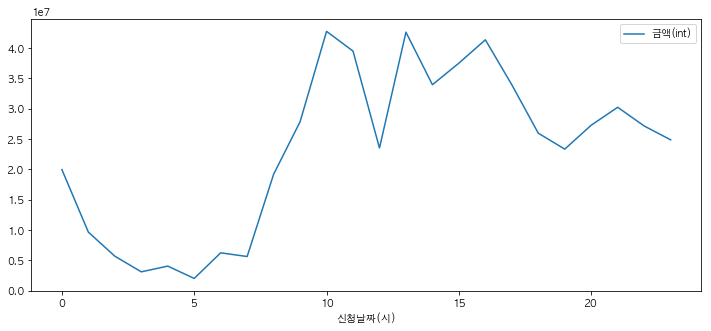

In [23]:
payments.pivot_table(values='금액(int)', index='신청날짜(시)', aggfunc='sum').plot(figsize=[12,5])

DS School 수강생들의 대부분이 직장인임을 감안할 때, 일별, 시간별 결제금액을 보고 '직장인들이 주로 근무시간에 결제를 결심한다.' 라는 합리적인 가설을 세울 수 있습니다. 이 가설은 점심시간대인 12시부터 1시 사이에 급격하게 감소하는 것을 통해 더 지지받을 수 있습니다.

이를 바탕으로 콘텐츠 제작자에게 근무시간에 딴 짓을 하는 직장인들을 타겟팅하는 콘텐츠를 제작해달라고 요청할 수 있습니다. 또한, 페이스북이 제공하는 광고 시간 타겟팅 기능을 이용하여 근무시간대에 들어가는 광고예산의 비중을 늘릴 수도 있습니다.


---

**7. 사용자의 니즈를 바탕으로 향후 오픈할 강의의 우선순위를 정하려고 합니다. 설문조사 데이터에서 답변을 정리해서 보여주세요.**

우선, 각 질문과 답변의 내용은 다음과 같습니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>question_text</th>
      <th>answer1_text</th>
      <th>answer2_text</th>
      <th>answer3_text</th>
      <th>answer4_text</th>
      <th>answer5_text</th>
      <th>answer6_text</th>
      <th>answer7_text</th>
      <th>answer8_text</th>
      <th>answer9_text</th>
      <th>answer10_text</th>
      <th>answer11_text</th>
      <th>answer12_text</th>
    </tr>
    <tr>
      <th>question_id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>데이터 사이언스를 배우고 싶은 이유는 무엇인가요?</td>
      <td>현재 다니는 직장에서 즉시 활용할만한 데이터 관련 지식을 습득하기 위해</td>
      <td>데이터와 인공지능 관련 석사/박사로 진학하기 위해</td>
      <td>풀타임 데이터 사이언티스트로 취업/이직을 하기 위해</td>
      <td>기술 창업을 위한 원천기술을 습득하기 위해</td>
      <td>최신 데이터사이언스 트렌드에 관심이 있어서</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>이전까지 수학, 통계학, 프로그래밍에 관한 공부를 얼만큼 하셨나요?</td>
      <td>최근 2~3년간 수학, 통계학 공부를 해 본 적이 없으며, 프로그래밍 역시 해 본 ...</td>
      <td>수학과 통계학은 자신 없지만, 프로그래밍은 조금 해 보았다.</td>
      <td>최근까지 수학과 통계학을 공부해왔지만, 프로그래밍은 해 본 적 없다.</td>
      <td>수학과 통계학을 공부하였으며, 프로그래밍도 할 줄 안다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>데이터 사이언스를 어디에 활용하고 싶으신가요? (복수 선택 가능)</td>
      <td>상품, 컨텐츠 추천 엔진을 구현하고 싶다. (ex: 의류, 영화, 음악 추천 등)</td>
      <td>주가를 분석하고 예측할 수 있는 방법을 알고 싶다. (ex: 주가 등락, 비트코인 ...</td>
      <td>부동산 시세와 그 등락을 예측하고 싶다. (ex: 아파트, 점포, 오피스텔 등)</td>
      <td>텍스트 데이터를 적극 활용해보고 싶다. (ex: 스팸 필터링, 검색 엔진, 법률/판...</td>
      <td>이미지 데이터를 다뤄보고 싶다. (ex: 얼굴 인식, 자동차 표시판 분석 등)</td>
      <td>온라인 커머스에서 판매하는 상품의 재구매율을 늘리고 싶다.</td>
      <td>정기 구독 상품의 구독 이탈률(Churn Rate)을 낮출 수 있는 방법을 알고 싶다.</td>
      <td>마케팅 데이터를 분석하여, 온라인 마케팅의 효율을 높이고 싶다.</td>
      <td>해상사고나 범죄를 분석/예측하여 그 비율을 낮추고 싶다.</td>
      <td>의료 데이터나 신약 분석 등에 활용하고 싶다.</td>
      <td>공공데이터를 활용하는데 도움이 되고 싶다.</td>
      <td>기타</td>
    </tr>
    <tr>
      <th>4</th>
      <td>수강을 하면서 과제를 어느정도까지 완수하실 수 있으신가요?</td>
      <td>현재 하는 일이 바빠서, 과제가 주어지면 전혀 할 수가 없다.</td>
      <td>여가시간을 활용하여 무리하지 않는 선에서 어느정도의 과제는 해결할 수 있다.</td>
      <td>다소 시간이 넉넉하기 때문에 많은 과제가 주어진다고 해도 충분히 완수할 수 있다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>5</th>
      <td>DS School의 과정을 마친 후 데이터를 얼만큼 잘 다루고 싶은가요?</td>
      <td>취미로 데이터를 다뤄볼 수 있을 정도면 충분하다.</td>
      <td>대학원 연구실에 가도 뒤쳐지지 않을 만큼 이론과 실전 경험을 쌓고 싶다.</td>
      <td>현재 다니는 회사에서 데이터 관련 업무를 병행할 수 있을 만큼 실력을 쌓고 싶다.</td>
      <td>풀타임 데이터 사이언티스트로 취업/이직할 수 있을 만큼 실력을 쌓고 싶다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>6</th>
      <td>수업은 어느 시간을 선호하시나요? (중복 선택 가능)</td>
      <td>주중 아침</td>
      <td>주중 낮</td>
      <td>주중 저녁</td>
      <td>주말 아침</td>
      <td>주말 낮</td>
      <td>주말 저녁</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>7</th>
      <td>수업을 듣는 기간동안 얼만큼 시간을 할애할 수 있나요?</td>
      <td>현재 하는 일에 지장이 없는 선에서, 파트타임으로 수업을 들을 수 있다.</td>
      <td>현재 하는 일은 쉬는 한이 있더라도, 풀타임으로 수업을 듣고 싶다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>

고객들이 데이터 사이언스를 어디에 활용하고 싶은지에 대한 이유를 정리하기 위해서는 1번 3번 질문에 대한 정답을 정리해서 보여주어야 합니다. 판다스의 피벗 테이블을 이용하여 1번, 3번 질문에 대한 응답을 정리해서 보여주세요. 

완성된 피벗 테이블은 다음과 같은 모양이 나와야 합니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>answer1_selected(bool)</th>
      <th>answer2_selected(bool)</th>
      <th>answer3_selected(bool)</th>
      <th>answer4_selected(bool)</th>
      <th>answer5_selected(bool)</th>
      <th>answer6_selected(bool)</th>
      <th>answer7_selected(bool)</th>
      <th>answer8_selected(bool)</th>
      <th>answer9_selected(bool)</th>
      <th>answer10_selected(bool)</th>
      <th>answer11_selected(bool)</th>
      <th>answer12_selected(bool)</th>
    </tr>
    <tr>
      <th>question_id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>0.321978</td>
      <td>0.093082</td>
      <td>0.238010</td>
      <td>0.074705</td>
      <td>0.272225</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.00000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.372238</td>
      <td>0.313507</td>
      <td>0.211327</td>
      <td>0.371489</td>
      <td>0.244438</td>
      <td>0.215821</td>
      <td>0.141958</td>
      <td>0.437186</td>
      <td>0.103079</td>
      <td>0.173421</td>
      <td>0.356281</td>
      <td>0.12368</td>
    </tr>
  </tbody>
</table>

In [24]:
#피벗테이블에서 value에 들어갈 answer_list를 만들어주세요. ['answer1_selected(bool)', ... , 'answer12_selected(bool)']의 형태입니다.
#일일이 입력해도 되고 for문과 formatting을 이용하여 만들 수도 있습니다.
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]

print(len(answer_list))
answer_list

12


['answer1_selected(bool)',
 'answer2_selected(bool)',
 'answer3_selected(bool)',
 'answer4_selected(bool)',
 'answer5_selected(bool)',
 'answer6_selected(bool)',
 'answer7_selected(bool)',
 'answer8_selected(bool)',
 'answer9_selected(bool)',
 'answer10_selected(bool)',
 'answer11_selected(bool)',
 'answer12_selected(bool)']

In [25]:
#pivot table을 만들어주세요.
table = pd.pivot_table(surveys,
                       index = 'question_id',
                       values = answer_list,
                       aggfunc = pd.np.mean,
                       dropna = False)

table = table[answer_list].loc[[1,3]]
table

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.321978,0.093082,0.238010,0.074705,0.272225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.372238,0.313507,0.211327,0.371489,0.244438,0.215821,0.141958,0.437186,0.103079,0.173421,0.356281,0.12368


1번 질문에는 1번 응답 (현재 다니는 직장에서 데이터 사이언스를 활용하기 위해) 가 가장 높은 답변을 받았고, 3번 질문에서는 8번 응답 (마케팅 데이터를 분석하여 마케팅의 효율을 높이고 싶다.)가 가장 높은 응답을 받았습니다.

하지만, 최종 목표는 결제 유도이기 때문에, 모든 설문조사를 완료한 사람이 아닌 결제를 완료한 사람들의 결과만을 가지고 분석해야 합니다. 이를 위해 surveys 테이블과 payments 테이블을 병합할 필요가 있습니다.

---

**8. 결제 데이터와 유저 데이터에는 동일한 id (payment_id), 유저 데이터와 설문조사 데이터에는 동일한 id (user_id)가 존재합니다. 각자 가져와서 pandas merge로 해주세요.**

필요한 것은 결제 데이터와 설문조사 데이터를 조인하는 것이지만, 각각에게 필요한 id가 유저 테이블에 존재하는 상황입니다. 따라서 merge를 2번 해야 결제 데이터와 설문조사 데이터를 합칠 수 있는 상황입니다.

우선 결제 데이터와 유저 데이터를 이메일을 기준으로 조인해주세요. 그 후에 설문조사 데이터를 조인해주시면 필요로 하는 데이터프레임이 완성이 됩니다.

병합 2번이 완료된 경우 다음과 같은 테이블이 나오게 됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>payment_id_x</th>
      <th>이름</th>
      <th>이메일</th>
      <th>연락처</th>
      <th>신청날짜</th>
      <th>신청수업</th>
      <th>금액</th>
      <th>결제방법</th>
      <th>상태</th>
      <th>연락처(clean)</th>
      <th>기수</th>
      <th>수업타입</th>
      <th>상태(bool)</th>
      <th>신청날짜(연)</th>
      <th>신청날짜(월)</th>
      <th>신청날짜(일)</th>
      <th>신청날짜(시)</th>
      <th>신청날짜(분)</th>
      <th>신청날짜(초)</th>
      <th>신청날짜(요일)</th>
      <th>금액(int)</th>
      <th>user_id</th>
      <th>mixpanel_id</th>
      <th>payment_id_y</th>
      <th>email</th>
      <th>survey_id</th>
      <th>question_id</th>
      <th>answer1_selected</th>
      <th>answer2_selected</th>
      <th>answer3_selected</th>
      <th>answer4_selected</th>
      <th>answer5_selected</th>
      <th>answer6_selected</th>
      <th>answer7_selected</th>
      <th>answer8_selected</th>
      <th>answer9_selected</th>
      <th>answer10_selected</th>
      <th>answer11_selected</th>
      <th>answer12_selected</th>
      <th>created_at</th>
      <th>updated_at</th>
      <th>answer1_selected(bool)</th>
      <th>answer2_selected(bool)</th>
      <th>answer3_selected(bool)</th>
      <th>answer4_selected(bool)</th>
      <th>answer5_selected(bool)</th>
      <th>answer6_selected(bool)</th>
      <th>answer7_selected(bool)</th>
      <th>answer8_selected(bool)</th>
      <th>answer9_selected(bool)</th>
      <th>answer10_selected(bool)</th>
      <th>answer11_selected(bool)</th>
      <th>answer12_selected(bool)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>aiym79ous7l8</td>
      <td>고세준</td>
      <td>0usbs4knns0s@dsschool.co.kr</td>
      <td>01056007186</td>
      <td>2018-01-31 15:42:20</td>
      <td>입문반 22기</td>
      <td>495,000</td>
      <td>카드결제</td>
      <td>결제 완료</td>
      <td>NaN</td>
      <td>22기</td>
      <td>입문반</td>
      <td>True</td>
      <td>2018</td>
      <td>1</td>
      <td>31</td>
      <td>15</td>
      <td>42</td>
      <td>20</td>
      <td>Wednesday</td>
      <td>495000</td>
      <td>drdi7xmsj0nm</td>
      <td>NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...</td>
      <td>None</td>
      <td>0usbs4knns0s@dsschool.co.kr</td>
      <td>nnvz4nsy03ob</td>
      <td>1</td>
      <td>f</td>
      <td>t</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>2018-01-31 06:15:13.343156</td>
      <td>2018-01-31 06:15:13.343156</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1</th>
      <td>aiym79ous7l8</td>
      <td>고세준</td>
      <td>0usbs4knns0s@dsschool.co.kr</td>
      <td>01056007186</td>
      <td>2018-01-31 15:42:20</td>
      <td>입문반 22기</td>
      <td>495,000</td>
      <td>카드결제</td>
      <td>결제 완료</td>
      <td>NaN</td>
      <td>22기</td>
      <td>입문반</td>
      <td>True</td>
      <td>2018</td>
      <td>1</td>
      <td>31</td>
      <td>15</td>
      <td>42</td>
      <td>20</td>
      <td>Wednesday</td>
      <td>495000</td>
      <td>drdi7xmsj0nm</td>
      <td>NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...</td>
      <td>None</td>
      <td>0usbs4knns0s@dsschool.co.kr</td>
      <td>ihb40hmj9393</td>
      <td>2</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>t</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>2018-01-31 06:15:23.300754</td>
      <td>2018-01-31 06:15:23.300754</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2</th>
      <td>aiym79ous7l8</td>
      <td>고세준</td>
      <td>0usbs4knns0s@dsschool.co.kr</td>
      <td>01056007186</td>
      <td>2018-01-31 15:42:20</td>
      <td>입문반 22기</td>
      <td>495,000</td>
      <td>카드결제</td>
      <td>결제 완료</td>
      <td>NaN</td>
      <td>22기</td>
      <td>입문반</td>
      <td>True</td>
      <td>2018</td>
      <td>1</td>
      <td>31</td>
      <td>15</td>
      <td>42</td>
      <td>20</td>
      <td>Wednesday</td>
      <td>495000</td>
      <td>drdi7xmsj0nm</td>
      <td>NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...</td>
      <td>None</td>
      <td>0usbs4knns0s@dsschool.co.kr</td>
      <td>p9p9ygppdbel</td>
      <td>3</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>t</td>
      <td>t</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>f</td>
      <td>t</td>
      <td>f</td>
      <td>2018-01-31 06:15:45.486897</td>
      <td>2018-01-31 06:15:45.486897</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
    </tr>
  </tbody>
</table>

In [26]:
# 우선 users 테이블을 쿼리를 이용해 불러와주세요, 그 다음 전처리를 완료해두었던 payments_complete 테이블과 users 테이블을 병합해주세요.
users = pd.read_sql("SELECT * FROM 'users'", connect)


#payments와 users가 병합된 테이블에 다시 surveys를 병합합니다. 모든 병합은 inner로 진행합니다.
data = (
    payments.merge(users, left_on = '이메일', right_on='email', how='inner')
#surveys와는 user_id를 기준으로 병합합니다.
                    .merge(surveys, on='user_id', how='inner')
)

print(data.shape)
data.head(3)

(3035, 53)


,payment_id_x,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),기수,수업타입,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int),user_id,mixpanel_id,payment_id_y,email,...,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,22기,입문반,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,t,f,f,f,None,None,None,None,None,None,None,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156,False,True,False,False,False,False,False,False,False,False,False,False
1,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,22기,입문반,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,None,None,None,None,None,None,None,None,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754,False,False,False,True,False,False,False,False,False,False,False,False
2,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,22기,입문반,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,t,f,f,f,f,f,t,f,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897,False,False,False,True,True,False,False,False,False,False,True,False


---

**9. 결제 데이터와 유저 데이터에는 동일한 id (e-mail), 유저 데이터와 설문조사 데이터에는 동일한 id (user_id)가 존재합니다. 각자 가져와서 SQL join으로 합쳐주세요.**

위와 똑같은 문제를 쿼리문을 이용해 풀어보도록 하겠습니다.

실제 데이터가 방대한 경우 users와 payments를 불러온 다음에 통합하는 것보다는 쿼리문으로 필요한 것만 골라서 받아오는 것이 자원활용을 효율적으로 할 수 있는 방법입니다.

In [27]:
# SELECT () FROM () INNER JOIN () ON () INNER JOIN () ON ()' 구조의 쿼리문을 작성해주시면 됩니다. 
query = "SELECT * FROM payments \
         INNER JOIN users ON payments.이메일 = users.email \
         INNER JOIN surveys ON users.user_id = surveys.user_id" \

data_from_db = pd.read_sql(query, connect)

print(data_from_db.shape)
data_from_db.head(3)

(3884, 30)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,user_id,mixpanel_id,payment_id,email,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,5vtq11wow61w,한서훈,3xy4zzr6k13x@dsschool.co.kr,01040513577,2018-01-03 14:44:12,입문반 19기,"495,000",카드결제,결제 완료,orqcrchp0s2a,OJRXJURAXLJMMAWURTWSNBUJIRJJIVSHDHBBBPORBVRPPQ...,None,3xy4zzr6k13x@dsschool.co.kr,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,209h7wqy7bdf,김재호,ao6kez00wxnh@dsschool.co.kr,010-6880-0251,2017-10-22 08:53:29,입문반 11기,"495,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152
2,uh701zm4irgx,김재호,ao6kez00wxnh@dsschool.co.kr,010-7202-2433,2017-12-21 16:47:00,딥러닝 2기,"1,043,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152


---

**10. 위에서 merging한 데이터 중 필요한 컬럼만 추려주세요. 그리고 데이터를 클리닝해주세요.**

모든 테이블을 병합한 상태이기 때문에 데이터의 컬럼이 과도하게 많은 상태입니다. 모든 컬럼을 분석에 사용할 필요가 없기 때문에 사용할 컬럼만 골라 데이터를 슬라이싱하려고 합니다. 사용할 컬럼을 아래에 적어놓았습니다. 컬럼명이 다른 경우 수정해서 사용해주세요.

In [28]:
# 분석에 필요한 컬럼들의 리스트입니다.
selected_columns = ['user_id',  '이름', '연락처(clean)', '이메일', '신청수업', '금액(int)', '결제방법', '신청날짜', '상태(bool)', 'mixpanel_id']

selected_columns += [
    'question_id',
    'answer1_selected(bool)', 'answer2_selected(bool)', 'answer3_selected(bool)',
    'answer4_selected(bool)', 'answer5_selected(bool)', 'answer6_selected(bool)',
    'answer7_selected(bool)', 'answer8_selected(bool)', 'answer9_selected(bool)',
    'answer10_selected(bool)', 'answer11_selected(bool)', 'answer12_selected(bool)'
]

selected_columns += [
    'created_at', 'updated_at'
]

#위의 리스트를 이용하여 데이터에 필요한 컬럼만 남깁니다.
data = data[selected_columns]

print(data.shape)
data.head()

(3035, 25)


,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
0,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,1,False,True,False,False,False,False,False,False,False,False,False,False,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156
1,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,2,False,False,False,True,False,False,False,False,False,False,False,False,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754
2,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,3,False,False,False,True,True,False,False,False,False,False,True,False,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897
3,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,4,False,False,True,False,False,False,False,False,False,False,False,False,2018-01-31 06:15:52.621368,2018-01-31 06:15:52.621368
4,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,5,False,True,False,False,False,False,False,False,False,False,False,False,2018-01-31 06:16:00.043586,2018-01-31 06:16:00.043586


사용하고 있는 데이터는 payments_complete와 surveys를 병합한 데이터로 전부 결제를 완료한 사람들의 설문조사 데이터입니다. 하지만, 결제를 한 이후에도 설문조사를 하신 경우 있고 한 사람이 여러번 설문조사를 한 경우가 있는데 결제를 한 이후에도 설문조사를 한 경우는 삭제하고 여러번 설문조사를 한 경우는 첫번째 설문 조사만 남기고 중복정보도 제거해주어야 합니다.

먼저 신청날짜와 created_at 컬럼을 이용하여 결제를 한 이후에도 설문조사를 한 경우는 삭제하여 주세요. 또한, 이메일과 신청수업, question_id 3개가 중복되는 경우는 drop_duplicates()를 이용해 최신의 정보만 남겨주세요. 중복을 제거하고 남길 데이터를 선택하는 방법은 keep 옵션을 활용하면 됩니다. **단 중복제거하기 전에 "이메일", "question_id", "created_at" 컬럼을 기준으로 sorting 해야 합니다.**

In [29]:
#신청날짜가 created_at보다 크거나 같은 경우만 남깁니다. 이는 결제를 한 이후에도 설문조사를 한 경우를 배제하기 위함입니다.
data = data[data['신청날짜'] >= data['created_at']]

In [30]:
# 이 중, 이메일과 신청수업, question_id가 중복되는 경우는 drop_duplicates를 이용해 첫 정보만 남겨주세요. 첫 정보만 남기는 방법은 keep 옵션을 활용하시면 됩니다.

data = data.sort_values(by = ["이메일", "question_id", "created_at"])
data = data.drop_duplicates(['이메일', '신청수업', "question_id"], keep='last')

print(data.shape)
data.head()

(1092, 25)


,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
887,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:38.247526,2018-01-17 06:31:38.247526
888,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:42.281112,2018-01-17 06:31:42.281112
889,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,3,True,False,False,True,False,True,False,False,False,False,False,False,2018-01-17 06:31:55.697999,2018-01-17 06:31:55.697999
890,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,4,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:59.842555,2018-01-17 06:31:59.842555
891,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,5,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:32:03.640220,2018-01-17 06:32:03.640220


---

**11. 위에서 정리한 결과를 바탕으로 결제를 한 사람들의 설문조사 1,3번 응답결과를 정리해주세요.**

이 문제를 풀기 위해 많은 전처리 과정을 거쳐왔습니다. 실제로 결제를 한 사람들의 1,3번 질문 대답을 피벗 테이블을 이용하여 정리해주세요. 그리고, 설문조사를 완료한 모든 사람의 결과와 이를 비교해주세요.

In [31]:
# 우선 결제를 완료한 사람들의 데이터 테이블을 이용하여 피벗테이블을 만들어주세요.
table_purchased = pd.pivot_table(data,
                                 index='question_id',
                                 values=answer_list,
                                 aggfunc='mean')

table_purchased = table_purchased[answer_list].loc[[1,3]]

table_purchased

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.314103,0.115385,0.262821,0.076923,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.474359,0.391026,0.269231,0.429487,0.294872,0.262821,0.217949,0.410256,0.121795,0.211538,0.391026,0.147436


이제 위의 결과와 비교를 해야합니다. 표 2개를 놓고 직접적으로 비교하는 방법도 있지만, 역시 그래프로 비교하는 것이 더 직관적인 경우도 있습니다.

지금의 경우도 마찬가지로 그래프로 둘의 차이를 비교하는 것이 훨씬 보기 좋습니다. 판다스에서는 기본으로 데이터프레임에서 `plot()`메소드를 제공합니다. 이는 내부적으로 matplotlib이라는 시각화 툴을 불러와 그래프를 그려줍니다. 이 plot 메소드를 이용해 데이터프레임을 쉽게 그래프로 변환할 수 있습니다. 시각화에 관련된 상세한 내용은 3주차에 다루도록 하겠습니다. DataFrame.plot()에 관련된 옵션은 [다음 링크](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)를 참조해주세요.

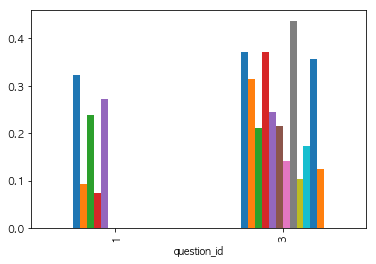

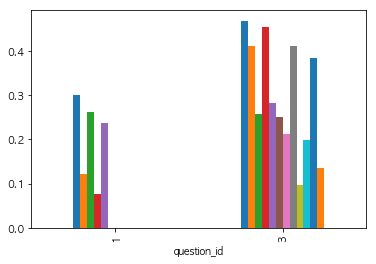

In [32]:
# 모든 설문조사 데이터로 수행한 위에서 만든 결과와 결제한 사람들의 설문조사 결과를 DataFrame.plot()을 이용해 비교해주세요.
# 적절한 그래프의 종류를 설정하는 것이 중요합니다. kind와 legend 옵션만을 이용했을 때, 다음과 같은 결과가 나옵니다.
table.plot(kind='bar', legend=False)

table_purchased.plot(kind='bar', legend=False)

모든 설문조사 결과와 결제한 사람들의 설문조사 결과는 상당히 비슷한 양상을 보입니다. 그런데, 1번 질문의 5번 응답 '최신 데이터사이언스 트렌드에 관심이 있어서' 응답을 한 경우는 결제율이 낮다는 것을 알 수 있습니다. 

아무래도 고가의 강의이다 보니, 관심만 있는 정도로는 구매로의 전환이 쉽게 일어나지 않습니다.
1번 응답 (현재 다니는 직장에서 데이터 사이언스를 활용하기 위해)의 비율이 압도적으로 높고, 두 번째는 전업 데이터 사이언티스트로 이직/전직하기 입니다. 

모든 사람을 대상 설문조사 결과와 결제자 대상 설문조사 결과를 3번 질문에서도 비교해 봤을 때, 응답 8번 또한 눈에 띄게 줄어든 것을 확인할 수 있습니다. 8번의 응답은 '마케팅 데이터를 분석하여 마케팅의 효율을 높이기' 입니다. 이를 바탕으로 마케팅에 관심이 있는 사람들은 데이터 마케팅 강의로 이탈하거나 사이언스 강의를 수강하지 않는다고 생각할 수 있습니다. 

현재 설문조사 결과를 종합해봤을 떄, 직장에서 업무에 데이터 사이언스를 활용하면서 '추천 시스템'을 만들거나 텍스트 데이터를 다루는 것에 대한 수요가 매우 높음을 확인할 수 있습니다.

엑셀에도 텍스트를 다룰 수 있는 기능들이 많이 있지만, 파이썬은 다양한 오픈소스와 함께 자유도가 높아 잘만 배워둔다면 엑셀에 비해 텍스트를 훨씬 쉽게 다룰 수 있습니다. 

또한, 카카오 같은 플랫폼 사업자나 여러 이커머스 기업들은 추천시스템 연구를 꾸준히 진행하고 있고 그 수요도 몹시 높은 편입니다. 이를 통해 향후 제작할 컨텐츠에서 텍스트나 추천시스템의 비중을 늘려볼까 합니다.

---

**12. created_at은 세션이 생성된 시간이고 '신청날짜'는 실제로 수업을 신청한 시간입니다. DS School 홈페이지에 처음 접근한 순간부터 결제까지 걸린 시간을 계산해주세요. 단, 신청날짜가 created_at보다 작은(먼저인) 경우가 있는데 이를 제외하고 구해주세요.**

대부분의 사용자가 DS School 홈페이지에 접속하자마자 결제를 하는 것이 아닌, 충분한 고민 후에 결제를 진행합니다. 사람들이 결제를 하는데까지 고민하는 시간을 잘 정리한다면 마케팅 부서에서 리타게팅 전략을 펼칠 때 소중한 자료로 활용할 수 있을 것입니다.

In [33]:
#신청날짜와 created_at은 datetime형식이기 때문에 연산이 가능합니다.
time = data['신청날짜'] - data['created_at']
time.head()

887   09:14:16.752474
888   09:14:12.718888
889   09:13:59.302001
890   09:13:55.157445
891   09:13:51.359780
dtype: timedelta64[ns]

예를 들어 09:14:16의 경우에는 9시간 14분 16초 걸렸다는 의미입니다. 이를 쉽게 그래프화 하기 위해 .dt를 이용하여 일 단위로 환산해 줍시다.
9시간 14분 16초를 일로 환산한다면 0.384907일 이 됩니다.

In [34]:
#time.dt.components 를 이용하면 해당 시간의 정보를 DataFrame으로 만들어줍니다.
time.dt.components.head(2)

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
887,0,9,14,16,752,474,0
888,0,9,14,12,718,888,0


In [35]:
time_int = \
time.dt.components['days'] + time.dt.components['hours'] / 24 + time.dt.components['minutes'] / (24*60) + time.dt.components['seconds'] / (24 * 60 * 60)

time_int.head()

887    0.384907
888    0.384861
889    0.384711
890    0.384664
891    0.384618
dtype: float64

In [36]:
#또는 dt.total_seconds() 를 이용하여 바꿀 수도 있습니다.
(time.dt.total_seconds()/(60*60*24)).head()

887    0.384916
888    0.384869
889    0.384714
890    0.384666
891    0.384622
dtype: float64

In [37]:
# 마찬가지로 seconds를 이용해 변환할 수도 있습니다.
(time.dt.seconds / (60 * 60 * 24)).head()

887    0.384907
888    0.384861
889    0.384711
890    0.384664
891    0.384618
dtype: float64

In [38]:
#그래프를 그리기 위한 library를 불러옵니다.
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# seaborn의 경우 테마설정을 다음과 같이 할 수 있습니다. 사전 구성된 테마는 다음과 같습니다. {darkgrid, whitegrid, dark, white, ticks}
sns.set_style("whitegrid", {'grid.linestyle': '--'})

time_int 데이터를 이용해 처음 접속 후 10일 이내 결제한 사람은 몇% 인가? 를 쉽게 파악할 수 있는 그래프를 그리려고 합니다. 

이는 데이터의 분포를 보는 것이기 때문에 distplot을 이용하는 것이 좋습니다. 그래프를 그리는 방법은 다음 수업시간에 더욱 상세하게 다룹니다.

/Users/oliverkim/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 25)

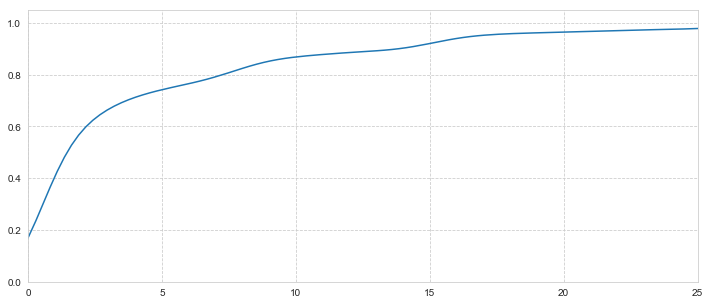

In [40]:
# distplot을 그려주세요, kde_kws={'cumulative' : True} 옵션을 통해 누적분포를 그리는 것이 좋습니다.
plt.figure(figsize=[12,5])
ax = sns.distplot(time_int,
                  hist=False,
                  #hist_kws=dict(cumulative=True),
                  kde_kws={'cumulative' : True})

ax.set_xlim(0, 25)

위의 분포를 통해 결제를 한 사람들 중 80% 이상이 10일 이내 결제, 그리고 나머지 20%는 더욱 오랜 기간동안 고민을 한다는 것을 파악할 수 있습니다. 이를 통해 DS School에 관심을 가졌지만 아직 결제를 하지 않은 잠재고객들의 결제 가능성을 역으로 추정해 리타겟팅 전략의 예산 분배를 진행할 수 있습니다. 

---


**13. 믹스패널 데이터를 불러와 주세요. 그리고 이를 users와 payments 테이블과 병합해주세요.** 

이번엔 마케팅 캠페인별 효율을 믹스패널 데이터를 이용해 비교분석하려고 합니다. 마케팅을 진행할 때, 사후분석을 위해 링크에 utm 파라미터들을 추가합니다. utm 파라미터에 대한 소개는 [다음 링크](https://brunch.co.kr/@jiyeonsongofnt/13) 를 참조해주세요. utm_campaign 파라미터에 캠페인 별로 값을 입력해놓으면 유입된 사용자를 캠페인 별로 추적하는 것이 가능해집니다.

우선 mixpanel 데이터를 `pd.read_csv()`를 이용해 읽어와주세요. 그 다음, mixpanel_id를 이용해 users 테이블과 병합, payment_id를 이용해 payments와 병합해주세요. users와는 inner, payments와는 믹스패널이 left가 되도록 하여 병합해주세요.

In [41]:
mixpanel_data = pd.read_csv('data/mixpanel_people_profiles_revised.csv')

print(mixpanel_data.shape)
mixpanel_data.head()

(17902, 20)


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id
0,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-16T22:00:21,iOS,Facebook Mobile,Seoul,KR,VGGPBLBXCDGZOSCVCODTNZBICKURLVAFKASUMZCNZQHEIU...
1,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-19T19:03:36,iOS,Mobile Safari,Incheon,KR,TIKFTLTMQQLYMKSDPCFCPNSOLHKLOQWQMIMKXBRUPVKEOD...
2,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-21T23:34:02,Windows,Firefox,Seoul,KR,WMFONVUFEIFDJOOZWJHPMTRKPDMKHPDBQSYKYTACHVODOL...
3,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T07:43:58,iOS,Facebook Mobile,Seoul,KR,DYXLHORZUNPSZSEXOIRNGCZWMEHHNKCTACJOFEEWEAFYVX...
4,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T15:03:48,Android,Chrome,Seoul,KR,BRQEHDPQRESBAIAURZIPTHTPDMJZSBBNACVCNMQFGXVXIP...


In [42]:
mixpanel_payments = (
    mixpanel_data.merge(users, how='inner', left_on='distinct_id', right_on='mixpanel_id')
                 .merge(payments, how='left', on='payment_id')
)    
print(mixpanel_payments.shape)
print(mixpanel_data.shape)

mixpanel_payments.head()

(13875, 44)
(17902, 20)


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id,user_id,mixpanel_id,payment_id,email,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),기수,수업타입,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
0,NaN,2017-09-01T09:27:57,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-01T09:30:07,Android,Chrome,Seoul,KR,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,j81umpsxbqer,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,None,xgyd2m7cz1tz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2017-09-25T11:08:25,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-25T11:08:33,Windows,Chrome,Seoul,KR,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,gc3riqbpec5a,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,None,ww4rloe4l6to@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2017-11-27T16:59:25,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-11-27T16:59:36,iOS,Facebook Mobile,Seoul,KR,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,h47v07u6u5zm,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,None,i97zkjstv1mz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2017-11-30T15:44:16,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-11-30T15:44:27,Windows,Internet Explorer,Suwon-si,KR,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,v6ln67rwsqo4,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,86dpwpocr5gi,w2gcxxhaam4s@dsschool.co.kr,이초현,g8zyxqrdgcgf@dsschool.co.kr,01088615300,2017-12-17 09:26:56,중급반 4기,"594,000",카드결제,결제 완료,010-8861-5300,4기,중급반,True,2017.0,12.0,17.0,9.0,26.0,56.0,Sunday,594000.0
4,NaN,2018-01-01T16:03:02,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2018-01-01T16:03:09,Windows,Chrome,Seoul,KR,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,mbwhfxfmmowu,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,None,rnippqcfcr09@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**14. 위에서 정리한 믹스패널 데이터를 바탕으로 캠페인별 유입 id의 수에 비해 결제 비율이 가장 높은 광고 캠페인을 찾아주세요.**

직접 접속한 고객들도 있고, 개인정보 보호 브라우저 등을 사용하는 고객들로 인해 항상 유입 경로를 추적하는게 가능하지는 않습니다.

`utm_campaign [first touch]`의 경우 해당 고객이 '처음'으로 유입된 캠페인이 무엇인지에 대한 정보입니다. 해당 컬럼이 비어있지 않은 데이터만 남기고, 피벗 테이블을 이용해 `utm_campaign [first touch]`별 실제 결제 비율을 구해주세요.

None

In [43]:
mixpanel_payments = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].notnull()]

In [44]:
#평균을 단순하게 mean으로 연산하기 위해 bool 타입 데이터를 정수형으로 변환해줍니다.
mixpanel_payments.loc[mixpanel_payments['상태(bool)'] == True, '상태(bool)'] = 1
mixpanel_payments.loc[mixpanel_payments['상태(bool)'] != True, '상태(bool)'] = 0

In [45]:
(
    pd.pivot_table(mixpanel_payments, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean')
    .sort_values('상태(bool)', ascending=False)
    .head(10)
)

,상태(bool)
utm_campaign [first touch],
dsschoolintro,0.333333
dripinsta7,0.066667
kang1,0.066667
5why2,0.055556
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303


head와 tail을 보면 극단적으로 많거나 (33%) 0%인 것을 확인할 수 있습니다. 이는 적은 예산을 쓴 캠페인은 해당 캠페인으로 부터 유입된 고객 자체가 적기 때문에 결과가 극단적으로 나오는 것입니다.

따라서, 유입 고객의 수가 20명 이상인 캠페인에 대해서만 위의 분석을 진행하기로 합니다. campaign으로부터 유입된 고객이 20명 이상인 캠페인만을 이용해 위의 피벗 테이블을 다시 만들어주세요.

In [46]:
campaign = mixpanel_payments['utm_campaign [first touch]'].value_counts()

In [47]:
over20_campaign = campaign[campaign > 20]
over20_campaign.head()

$none                  2166
soldout                 643
deeplearningtraffic     632
problem                 327
ryoovideo               264
Name: utm_campaign [first touch], dtype: int64

In [48]:
over20_data = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].isin(over20_campaign.index)]

(
    pd.pivot_table(over20_data, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean')
    .sort_values('상태(bool)', ascending=False)
    .head(10)
)

,상태(bool)
utm_campaign [first touch],
dripinsta7,0.066667
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303
univmajor,0.028037
sungwon,0.026316
Clab,0.024390


상위권의 캠페인들은 유입된 고객대비 결제율이 다른 캠페인에 비해 상당히 높은 것을 파악할 수 있습니다. 결제가 마케팅의 최종 목표이기 때문에, 마케팅팀에 해당 캠페인의 리스트를 전달해주어 해당 캠페인의 컨텐츠 내용을 분석한 뒤 가설을 세워 더 효율이 좋은 캠페인을 만들 수 있습니다.

---

**15. 결제 데이터를 바탕으로 두 개 이상의 강의를 수강한 고객들을 찾아주세요.**

DS School 강의에 만족도가 높은 고객분들은 여러개의 강의를 수강하고 가십니다. 이런 분들은 향후 오픈되는 강의도 수강하실 확률이 높기 때문에 VIP로 선정하여 DS School의 소식을 가장 최우선으로 전하고자 합니다. payments 테이블을 이용하여 이러한 고객분들을 찾아내어 구매 강좌수를 포함하여 데이터프레임으로 만들어주세요. 고객의 id는 이메일을 사용하시면 됩니다.

In [49]:
payments_complete = payments[payments["상태(bool)"] == True]

payments_complete = payments_complete.sort_values('신청날짜')
payments_complete = payments_complete.drop_duplicates(['이름', '이메일', "신청수업"], keep='last')

payments_email_counts = payments_complete["이메일"].value_counts()
payments_email_counts = payments_email_counts[payments_email_counts > 1]

payments_complete = payments_complete[payments_complete["이메일"].isin(payments_email_counts.index)]
payments_complete = payments_complete.sort_values(by = ['이름', '이메일', "신청수업"])

print(payments_complete.shape)
payments_complete.head()

(810, 21)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),기수,수업타입,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
185,mv7ohoittyov,강대규,uvhy2cm6jexv@dsschool.co.kr,010-7764-0861,2018-01-02 10:59:50,딥러닝 2기,"1,043,000",카드결제,결제 완료,010-7764-0861,2기,딥러닝,True,2018,1,2,10,59,50,Tuesday,1043000
328,i49gohaqdc7g,강대규,z5it9d3am5pn@dsschool.co.kr,010-2810-1605,2017-11-30 10:47:22,입문반 17기,"495,000",카드결제,결제 완료,010-2810-1605,17기,입문반,True,2017,11,30,10,47,22,Thursday,495000
503,mpuhgmvwrvxy,강민종,5y6m9tz8a0ua@dsschool.co.kr,01061528224,2017-10-30 23:31:11,입문반 12기,"495,000",카드결제,결제 완료,010-6152-8224,12기,입문반,True,2017,10,30,23,31,11,Monday,495000
208,di32b3c6b9gn,강서진,w9df010ys6yd@dsschool.co.kr,010-5450-6814,2017-12-28 17:54:17,딥러닝 2기,"1,043,000",카드결제,결제 완료,010-5450-6814,2기,딥러닝,True,2017,12,28,17,54,17,Thursday,1043000
572,opszgo4rdggk,강서진,w9df010ys6yd@dsschool.co.kr,010-6775-1500,2017-10-18 11:23:25,입문반 11기,"495,000",카드결제,결제 완료,010-6775-1500,11기,입문반,True,2017,10,18,11,23,25,Wednesday,495000


In [50]:
payments_complete[payments_complete.duplicated(subset=['이름', '이메일'], keep=False)].head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),기수,수업타입,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
208,di32b3c6b9gn,강서진,w9df010ys6yd@dsschool.co.kr,010-5450-6814,2017-12-28 17:54:17,딥러닝 2기,"1,043,000",카드결제,결제 완료,010-5450-6814,2기,딥러닝,True,2017,12,28,17,54,17,Thursday,1043000
572,opszgo4rdggk,강서진,w9df010ys6yd@dsschool.co.kr,010-6775-1500,2017-10-18 11:23:25,입문반 11기,"495,000",카드결제,결제 완료,010-6775-1500,11기,입문반,True,2017,10,18,11,23,25,Wednesday,495000
362,fim5rxkhv9ba,강서진,w9df010ys6yd@dsschool.co.kr,010-8055-5565,2017-11-22 08:07:11,중급반 4기,"594,000",카드결제,결제 완료,010-8055-5565,4기,중급반,True,2017,11,22,8,7,11,Wednesday,594000
456,dziqvrn49knl,강선영,1n04ko1pgq3r@dsschool.co.kr,010-4714-5480,2017-11-04 17:50:57,딥러닝 1기,"1,043,000",카드결제,결제 완료,010-4714-5480,1기,딥러닝,True,2017,11,4,17,50,57,Saturday,1043000
675,k8wd2krz3qcg,강선영,1n04ko1pgq3r@dsschool.co.kr,010-1746-0407,2017-09-13 22:56:56,입문반 9기,"495,000",카드결제,결제 완료,010-1746-0407,9기,입문반,True,2017,9,13,22,56,56,Wednesday,495000


In [51]:
num_bought = payments_complete.loc[payments_complete.duplicated(subset=['이름', '이메일'], keep=False), '이메일'].value_counts()\
.to_frame(name='구매 강좌수')

print(num_bought.shape)
num_bought.head(5)

(149, 1)


,구매 강좌수
1n04ko1pgq3r@dsschool.co.kr,4
uzzsngp7nk7z@dsschool.co.kr,3
uhvsbw6cjg19@dsschool.co.kr,3
9u2mz3w23uhk@dsschool.co.kr,3
18vwfdfclejc@dsschool.co.kr,3


## 제출

과제를 다 끝내셨으면 http://bit.ly/ds-assignment 에서 안내에 따라 과제를 제출하여 주세요! 과제를 제출해주시면 솔루션과 검토 결과를 드립니다. 오프라인 수업의 경우 과제를 제출하지 않으시더라도 솔루션은 다음 수업 시간에 제공해드립니다.

수업이나 과제 관련 질문, 수료증 문의 등은 담당 튜터(조교)에게 문의 주세요. 영수증 발급 등의 문의는 support@dsschool.co.kr 로 메일 주시면 담당자분이 응대해주실 겁니다. 기타 궁금한 사항은 슬랙으로 문의 주세요!